<a href="https://colab.research.google.com/github/Ar-Sh-11/ML_codes/blob/main/JPMC_QUANT_CHALLENGE_Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the tarining dataset and display
train = pd.read_csv('https://mettl-arq.s3.ap-southeast-1.amazonaws.com/questions/jp-morgan/quant-challenge-2023/machine-learning/Train.csv')#traindata
train.head()

,Date,Stock,liabilities,equity,total_assets,current_assets,current_liabilities,total_revenue,net_income,dividend,shares_outstanding,price
0,2006-07-31,Stock 1,625.898686,925.086518,1550.985204,675.789905,555.931329,548.488451,251.282553,68.184030,1040831,100.000000
1,2006-08-31,Stock 1,407.387467,903.249093,1310.636561,1023.110983,1295.186240,513.446432,207.576940,42.232672,1046649,101.924169
2,2006-09-29,Stock 1,464.069891,602.668832,1066.738722,709.711673,598.719338,503.519871,133.719700,28.835722,1094158,103.166191
3,2006-10-31,Stock 1,855.854937,391.375369,1247.230306,649.979564,733.594339,596.006397,-76.881818,0.000000,1018574,104.478956
4,2006-11-30,Stock 1,453.954969,956.490566,1410.445534,1115.594551,1152.274711,965.939247,-309.204301,0.000000,1036293,104.160907


In [3]:
#import the test dataset and display
test = pd.read_csv('https://mettl-arq.s3.ap-southeast-1.amazonaws.com/questions/jp-morgan/quant-challenge-2023/machine-learning/Test_x.csv')#testdata
test.head()

,Date,Stock,liabilities,equity,total_assets,current_assets,current_liabilities,total_revenue,net_income,dividend,shares_outstanding
0,2019-01-31,Stock 1,777.137456,411.991482,1189.128938,735.376019,834.292436,101.282767,44.303576,12.430562,1038979
1,2019-02-28,Stock 1,277.194579,499.621626,776.816206,462.172266,447.906629,119.483578,19.410210,4.298036,1033350
2,2019-03-29,Stock 1,496.436651,372.604918,869.041569,529.266640,683.167288,482.381171,-47.940167,0.000000,1093455
3,2019-04-30,Stock 1,484.533101,809.661340,1294.194441,412.770236,350.779135,570.934617,121.963652,31.066241,1047609
4,2019-05-31,Stock 1,290.520190,715.758617,1006.278807,802.761555,892.693784,277.522337,-78.316857,0.000000,1042163


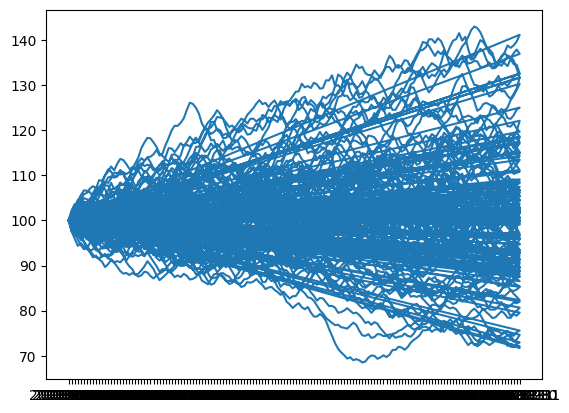

In [4]:
#plot the timeseries just to get a viz.
train1=train
plt.plot(train1['Date'],train['price'])

In [5]:
#split the columns to get a perfect model to train values
test['Month'] = test.apply(lambda row: int(row[0].split("-")[1]), axis = 1)
test['Date'] = test.apply(lambda row: int(row[0].split("-")[2]), axis = 1)
train['Month'] = train.apply(lambda row: int(row[0].split("-")[1]), axis = 1)
train['Date'] = train.apply(lambda row: int(row[0].split("-")[2]), axis = 1)
train['Stock'] = train.apply(lambda row: int(row[1].split(" ")[1]), axis = 1)
test['Stock'] = test.apply(lambda row: int(row[1].split(" ")[1]), axis = 1)
actual_price=train['price']
train_x = train.drop(['price'],axis=1)
train_x.head()

,Date,Stock,liabilities,equity,total_assets,current_assets,current_liabilities,total_revenue,net_income,dividend,shares_outstanding,Month
0,31,1,625.898686,925.086518,1550.985204,675.789905,555.931329,548.488451,251.282553,68.184030,1040831,7
1,31,1,407.387467,903.249093,1310.636561,1023.110983,1295.186240,513.446432,207.576940,42.232672,1046649,8
2,29,1,464.069891,602.668832,1066.738722,709.711673,598.719338,503.519871,133.719700,28.835722,1094158,9
3,31,1,855.854937,391.375369,1247.230306,649.979564,733.594339,596.006397,-76.881818,0.000000,1018574,10
4,30,1,453.954969,956.490566,1410.445534,1115.594551,1152.274711,965.939247,-309.204301,0.000000,1036293,11


In [6]:
#drop off the null values
train=train.dropna()

In [7]:
#import the GradientBoostingRegressor from scikit learn package and train and predict data
from sklearn.ensemble import GradientBoostingRegressor
grb_model = GradientBoostingRegressor(n_estimators=100, max_depth=8)
grb_model.fit(train_x, actual_price)
pred_price = grb_model.predict(test)
pred_price=pd.DataFrame(pred_price,columns=['Price'])#predicted prices

In [8]:
#display the predicted prices
pred_price.head()


,Price
0,120.943765
1,121.440366
2,116.198095
3,114.237173
4,116.179949
